In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(os.path.abspath(''))))
csv_data_path = os.path.join(BASE_DIR, 'diplomacy_gif_maker/diplomacy_gif_maker/csv')

In [3]:
unitChangeCount_df = pd.read_csv(csv_data_path + "/unitChangeCount_full.csv")
unitsByPlayer_df = pd.read_csv(csv_data_path + "/unitsByPlayer_full.csv")
orders_df = pd.read_csv(csv_data_path + "/orders_full.csv")

In [4]:
def get_number_of_seasons(current_year: int, current_season: str):
    number_of_years = current_year - 1901
    base_number = number_of_years*3
    if current_season=="spring":
        number_of_urls = base_number + 1
    elif current_season=="fall":
        number_of_urls = base_number + 2
    else:
        number_of_urls = base_number + 3
    return number_of_urls
num_seasons = get_number_of_seasons(1921, 'fall')

In [5]:
unitsByPlayer_df['unit_type'][17]

'F'

In [6]:
unitsByPlayer_df.unit_type.replace(["{'type': 'F', 'coast': 'sc'}", "{'type': 'F', 'coast': 'nc'}"], ['F', 'F'], inplace=True)

In [7]:
unitsByPlayer_df.to_csv(csv_data_path + "/unitsByPlayer_full.csv")

In [34]:
country_year_df = pd.DataFrame(unitsByPlayer_df.groupby(['country']).year.value_counts())
country_season_df = pd.DataFrame(unitsByPlayer_df.groupby(['country', 'year', 'season_number']).season.value_counts())

In [36]:
country_season_df

season
country year season_number season        
Austria 1901 1             spring       3
             2             fall         3
             3             winter       3
        1902 4             spring       5
             5             fall         5
...                                   ...
Turkey  1920 59            fall        14
             60            winter      14
        1921 61            spring      15
             62            fall        15
             63            winter      15

[334 rows x 1 columns]

In [48]:
country_year_df.index = country_year_df.index.rename(['country', 'years'])
country_season_df.index = country_season_df.index.rename(['country', 'year', 'season_number', 'seasons'])

In [49]:
country_year_df_sorted = country_year_df.sort_values(by=['country', 'years'])
country_season_df_sorted = country_season_df.sort_values(by=['country', 'year'])
country_year_df_sorted = country_year_df_sorted.reset_index(level=[0,1])
country_season_df_sorted = country_season_df_sorted.reset_index(level=[0,1,2,3])
country_year_df_sorted.columns = ['country', 'year', 'units']
country_season_df_sorted.columns = ['country', 'year', 'season_number','season', 'units']

In [50]:
country_season_df_sorted

,country,year,season_number,season,units
0,Austria,1901,1,spring,3
1,Austria,1901,2,fall,3
2,Austria,1901,3,winter,3
3,Austria,1902,4,spring,5
4,Austria,1902,5,fall,5
...,...,...,...,...,...
329,Turkey,1920,59,fall,14
330,Turkey,1920,60,winter,14
331,Turkey,1921,61,spring,15
332,Turkey,1921,62,fall,15


In [51]:
country_year_df_sorted.to_csv(csv_data_path + "/temp/country_year_df.csv")
country_season_df_sorted.to_csv(csv_data_path + "/temp/country_season_units_df.csv")

In [52]:
total_years = max(unitsByPlayer_df['year'])

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

In [54]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

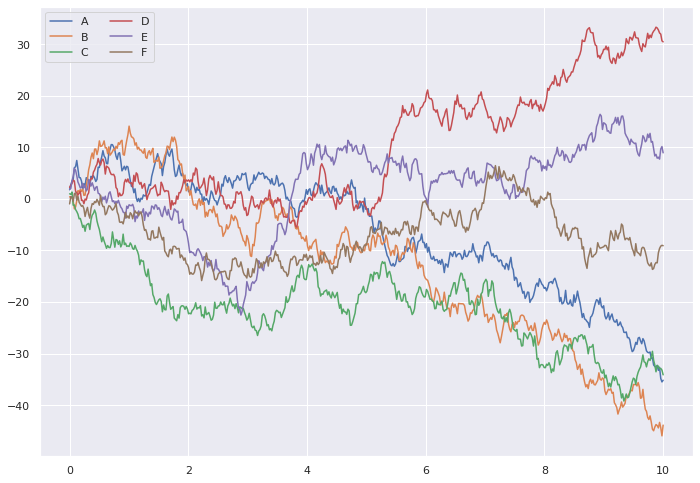

In [55]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [56]:
print(country_season_df_sorted.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   country        334 non-null    object
 1   year           334 non-null    int64 
 2   season_number  334 non-null    int64 
 3   season         334 non-null    object
 4   units          334 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 13.2+ KB
None


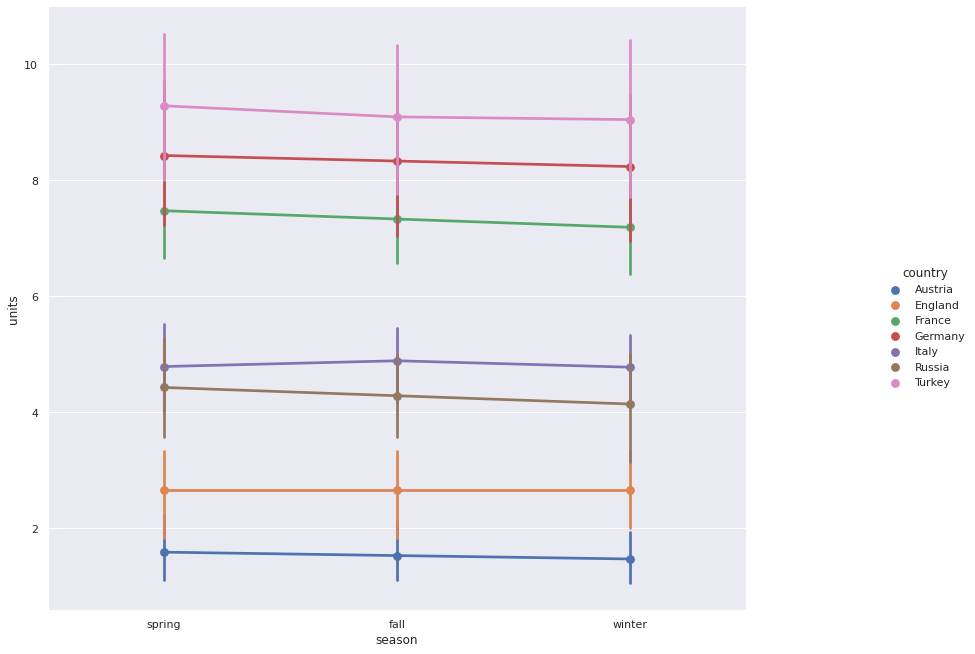

In [57]:
# plt.figure(figsize=(200, 6))
# plt.subplots(figsize=(20,15))
g=sns.catplot(x="season", y="units", hue="country", kind="point", data=country_season_df_sorted)
g.fig.set_size_inches(15,10)

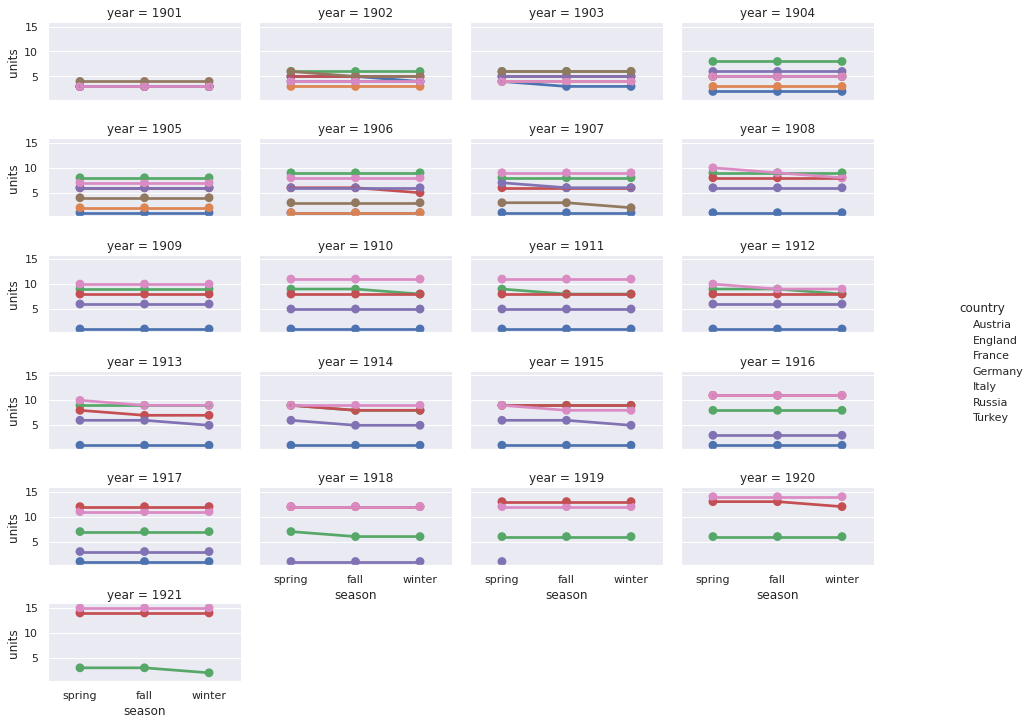

In [58]:
g = sns.FacetGrid(country_season_df_sorted, col="year", hue='country', col_wrap=4, height=2)
g.map(sns.pointplot, "season", "units", order=['spring', 'fall', 'winter'], ci=None)
# g.map(plt.scatter, "season", "units")
g.add_legend();
g.fig.set_size_inches(15,10)
# g.map(sns.barplot, x="year", y="units", hue="country", data=country_season_df_sorted);

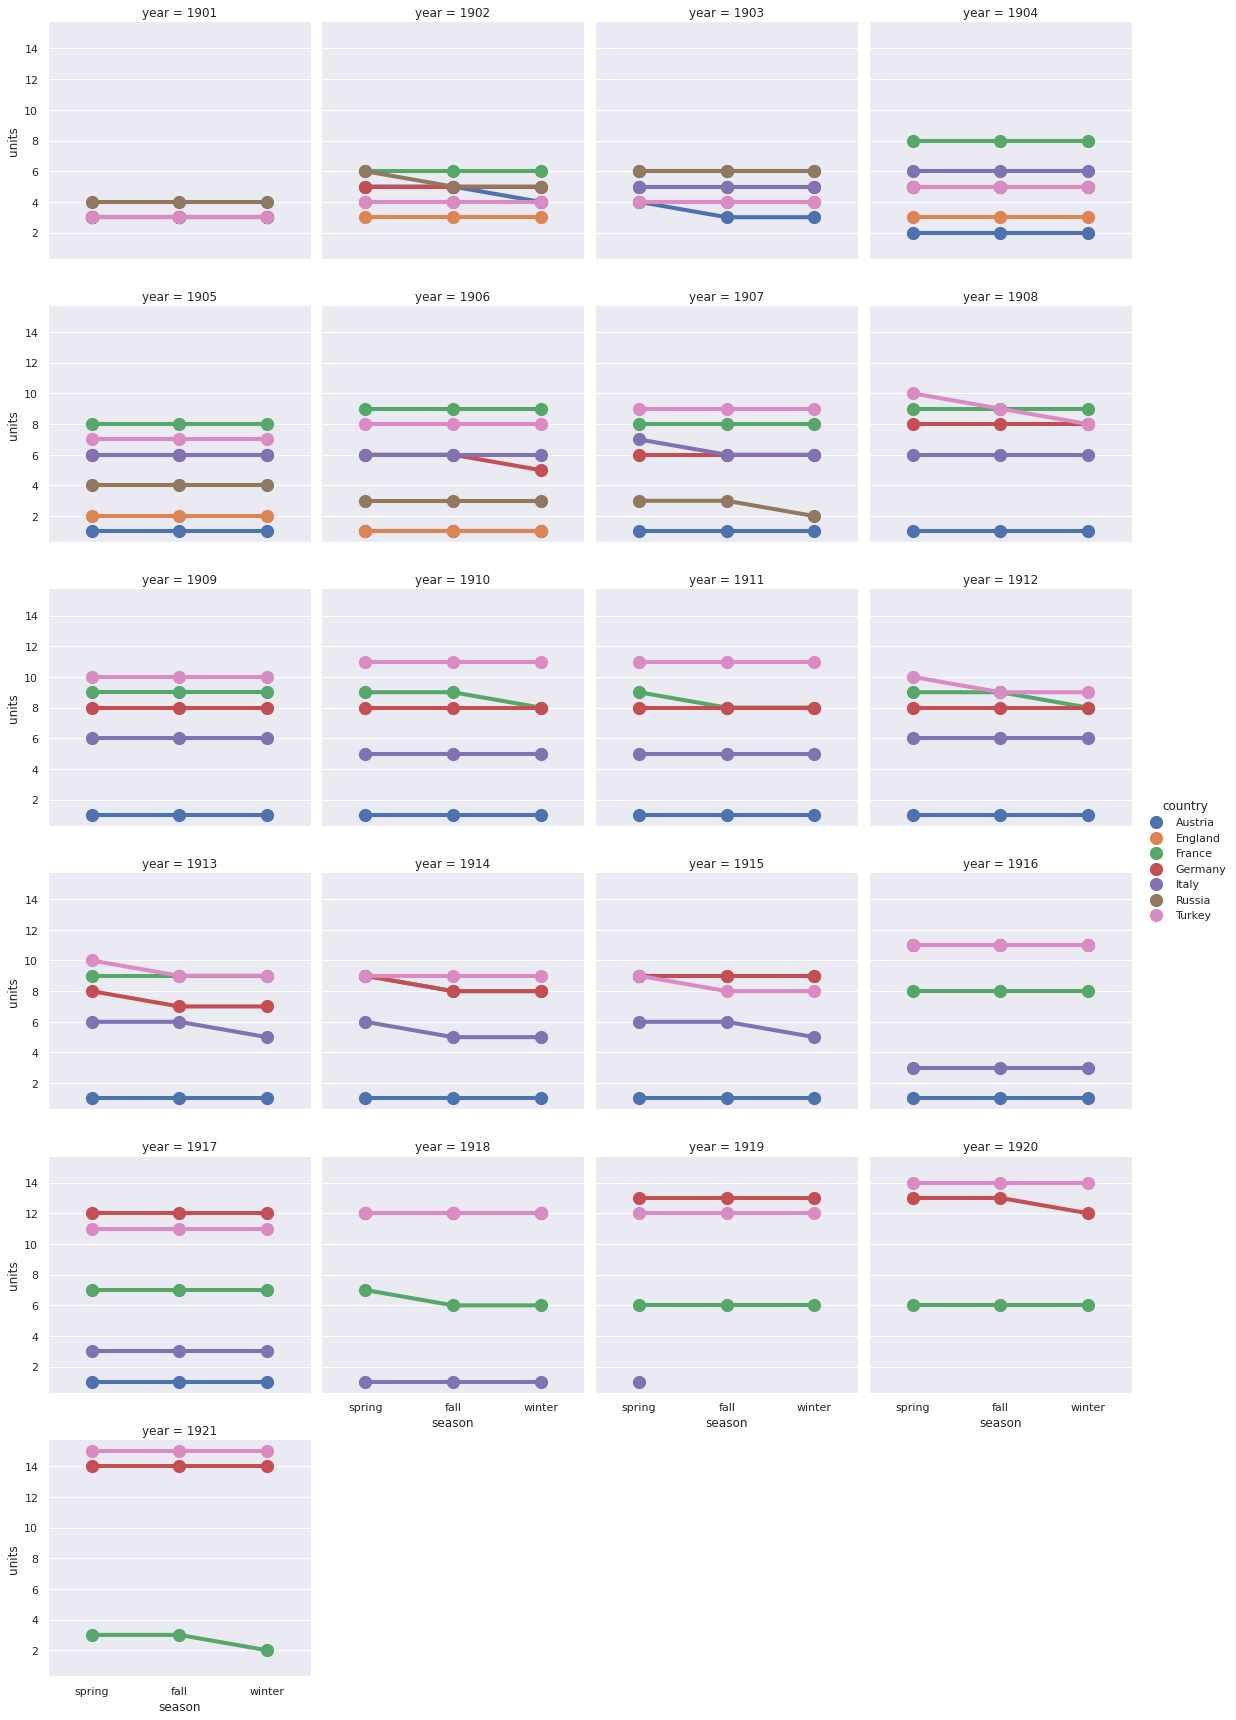

In [59]:
sns.catplot(x="season", y="units", hue="country", order=['spring', 'fall', 'winter'], col="year",
               col_wrap=4, height=4, aspect=1, scale=1.5,
               data=country_season_df_sorted, kind="point")

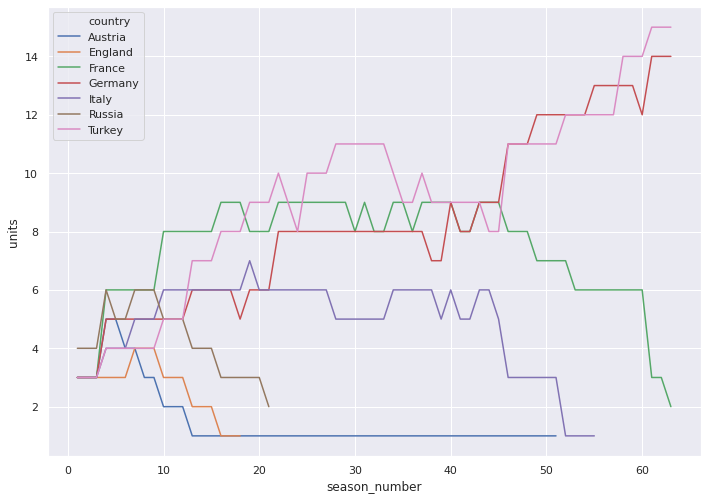

In [62]:
ax = sns.lineplot(x="season_number", y="units", hue="country", data=country_season_df_sorted)
# palette={'Yes':(1.0, 0.0, 0.0), 'No':(0.0, 0.0, 1.0)}

In [61]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
